In [76]:
# imports
!pip install "cloudpathlib[azure]" loguru tqdm typer rasterio pandas_path xarray-spatial

import pandas as pd
import numpy as np
import tensorflow as tf
import rasterio
import matplotlib.pyplot as plt
import xarray
import xrspatial.multispectral as ms
import PIL

     |████████████████████████████████| 10.9 MB 4.6 MB/s 
     |████████████████████████████████| 15.8 MB 26.2 MB/s 
     |████████████████████████████████| 837 kB 40.3 MB/s 
     |████████████████████████████████| 1.1 MB 48.1 MB/s 
     |████████████████████████████████| 596 kB 46.7 MB/s 
     |████████████████████████████████| 133 kB 47.7 MB/s 
     |████████████████████████████████| 76 kB 4.2 MB/s 
  Created wheel for datashape: filename=datashape-0.5.2-py3-none-any.whl size=59438 sha256=b9b411cfd8a2653890242696909a98c9f7f2b8223538823c4f6b68bf1317687c
  Stored in directory: /root/.cache/pip/wheels/b5/b7/80/333a5c3312ed4cd54f5d5b869868c14e0c6002cb5c7238b52d
Successfully built datashape
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
  Attempting uninstall: cloudpickle
    Found existing installation: cloudpickle 1.3.0
    Uninstalling cloudpickle-1.3.0:
      Successfully uninstalled 

In [2]:
RAW_DATA_PATH='../data/raw/'
INTERIM_DATA_PATH='../data/raw/'
PROCESSED_DATA_PATH='../data/raw/'
FUNTIONS_PATH='../functions/'

In [14]:
train_metadata=pd.read_csv(RAW_DATA_PATH+'train_metadata.csv')
!python FUNTIONS_PATH+'download_data.py' --cloud-directory "az://./train_labels" --sas-url RAW_DATA_PATH+'sas_centralus.txt' --local-directory RAW_DATA_PATH
!python FUNTIONS_PATH+'download_data.py' --cloud-directory "az://./train_features" --sas-url RAW_DATA_PATH+'sas_centralus.txt' --local-directory RAW_DATA_PATH


Text(0.5, 1.0, 'True color image for chip id lbee')

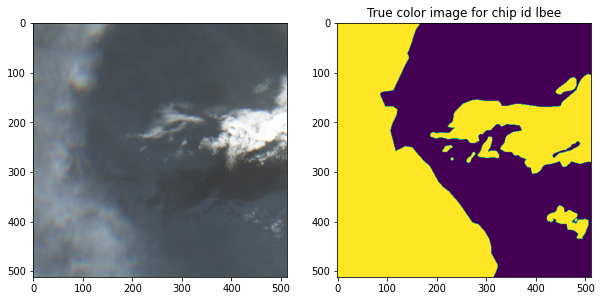

In [107]:


def get_xarray(filepath):
    """Put images in xarray.DataArray format"""
    im_arr = np.array(PIL.Image.open(filepath))
    return xarray.DataArray(im_arr, dims=["y", "x"])


def true_color_img(chip_id, data_dir=RAW_DATA_PATH+'train_features/'):
    """Given the path to the directory of Sentinel-2 chip feature images,
    plots the true color image"""
    chip_dir = data_dir+chip_id
    red = get_xarray(chip_dir+"/B04.tif")
    green = get_xarray(chip_dir+ "/B03.tif")
    blue = get_xarray(chip_dir+ "/B02.tif")

    return ms.true_color(r=red, g=green, b=blue)

random_image_index=np.random.randint(train_metadata.shape[0])
random_image_chip_id=train_metadata.chip_id[random_image_index]
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,10))
im = true_color_img(random_image_chip_id)
ax1.imshow(im)
plt.title(f"True color image for chip id {random_image_chip_id}")
im = get_xarray(RAW_DATA_PATH+'train_labels/train_labels/'+random_image_chip_id+'.tif')
ax2.imshow(im.data)
plt.title(f"True color image for chip id {random_image_chip_id}")

